<a href="https://colab.research.google.com/github/satishgunjal/Machine-Learning-Using-Python/blob/master/06_Training_and_Testing_Data/Training_and_Testing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training and Testing Data
Its good practice to first randomly sort and the data then split into two parts. 80% of data for training the model and remaining 20% of the data for testing the model.

The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.

Here we are going to use **sklearn.model_selection.train_test_split** method

We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function that can predict a price by taking mileage and age of the car as input

[Reference](ML/6_train_test_split/train_test_split.ipynb)

In [0]:
import pandas as pd

# Below code will work in case notebook is running locally and files are on same PC
#df = pd.read_csv('carprices.csv')
#df

In [31]:
from google.colab import files

uploaded = files.upload()

Saving carprices.csv to carprices (1).csv


In [32]:
import io

df = pd.read_csv(io.StringIO(uploaded['carprices.csv'].decode('utf-8')))
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


As you can see from data that there are independent variables (mileage and age) and one dependent variable (price). 
Best practice is to plot scatter plot and check the pattern of data to make better decision.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Car Mileage Vs Sell Price ($)

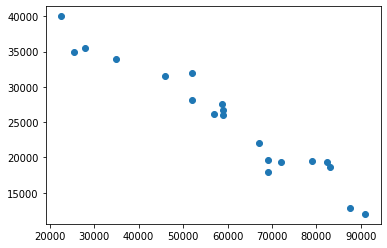

In [34]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

Car Age Vs Sell Price ($)

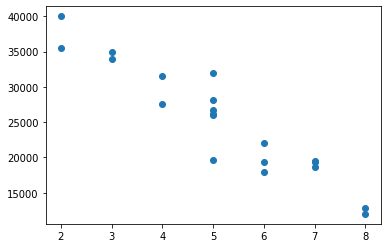

In [35]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

Lets assign the values to X and y variables

In [36]:
X = df[['Mileage','Age(yrs)']] # input must be two dimensional array
X.head(3)

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5


In [37]:
y = df['Sell Price($)']
y.head(3)

0    18000
1    34000
2    26100
Name: Sell Price($), dtype: int64

Now import the required sklearn library

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # test size is 20% and hence training size will be 80%

Note here above method will always generate random training and test sets. If for any reason you want samples to be same use parameter 'random_state = 10'

In [39]:
len(X_train)

16

In [40]:
len(X_test)

4

Now lets train the model using LinearRegression and training data

In [0]:
from sklearn.linear_model import LinearRegression # import LinearRegresion class
clf = LinearRegression() # clf is classifier which is nothing but the object of LinearRegression class

In [42]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now lets predict the values of y using tedt data

In [43]:
clf.predict(X_test)

array([37685.38685261, 22325.09326564, 16612.69237542, 20682.70072751])

Above are the predicted values of y using model trained using training data.

Actual values of y from test data are as below

In [44]:
y_test

16    35500
9     22000
14    19400
7     19300
Name: Sell Price($), dtype: int64

Instead of comparing these values mannually we can check the score of th emodel on test data.
It will compare the predicted values of based on test data with actual values from test data.

In [45]:
clf.score(X_test,y_test)

0.9188670877331032